In [26]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.datasets import load_digits

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report,confusion_matrix


from sklearn.model_selection import GridSearchCV



import warnings
warnings.filterwarnings('ignore')

In [3]:
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [4]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 432x288 with 0 Axes>

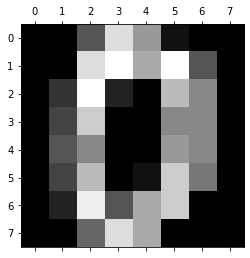

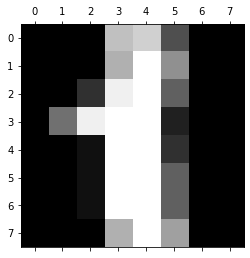

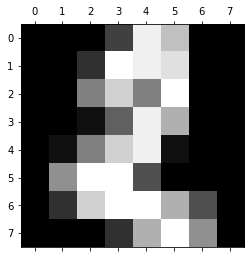

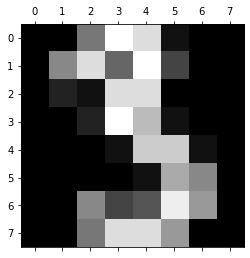

In [5]:
plt.gray() 
for i in range(4):
    plt.matshow(digits.images[i]) 

In [6]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [7]:
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [10]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [11]:
df['target'] = digits.target

In [13]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


## Model Building

In [14]:
X = df.drop('target', axis=1)
y = df['target']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [21]:
rf_model = RandomForestClassifier(n_estimators=50)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [22]:
rf_model.score(X_test, y_test)

0.9722222222222222

In [24]:
y_pred = rf_model.predict(X_test)
y_pred

array([0, 2, 1, 5, 1, 0, 3, 3, 5, 0, 7, 2, 0, 6, 4, 0, 9, 7, 4, 2, 7, 7,
       9, 3, 2, 5, 2, 2, 0, 3, 4, 8, 9, 1, 5, 5, 2, 5, 3, 6, 0, 0, 5, 7,
       4, 2, 2, 2, 8, 7, 3, 3, 9, 8, 4, 7, 0, 2, 4, 1, 1, 4, 0, 1, 0, 2,
       2, 0, 5, 4, 8, 3, 4, 0, 4, 1, 4, 7, 1, 0, 4, 6, 6, 2, 4, 6, 2, 6,
       6, 0, 8, 6, 6, 6, 8, 8, 2, 0, 8, 3, 9, 5, 6, 0, 4, 2, 4, 3, 5, 2,
       9, 2, 6, 0, 2, 7, 7, 7, 7, 8, 7, 1, 6, 3, 7, 2, 1, 5, 1, 6, 8, 8,
       8, 5, 9, 7, 7, 3, 3, 5, 1, 8, 3, 7, 2, 4, 1, 3, 2, 5, 6, 3, 1, 8,
       0, 7, 3, 1, 7, 6, 8, 0, 0, 3, 6, 0, 1, 6, 4, 7, 8, 6, 1, 1, 9, 6,
       4, 1, 2, 7, 9, 6, 3, 2, 9, 1, 5, 5, 1, 3, 6, 1, 8, 2, 0, 4, 7, 0,
       8, 1, 9, 6, 5, 2, 8, 5, 2, 6, 5, 0, 9, 1, 0, 5, 3, 5, 9, 0, 5, 9,
       6, 8, 4, 9, 3, 9, 9, 8, 1, 9, 0, 8, 1, 5, 7, 4, 0, 6, 4, 4, 0, 1,
       0, 4, 3, 4, 8, 1, 4, 6, 7, 3, 1, 6, 0, 9, 4, 2, 2, 2, 7, 2, 2, 1,
       7, 4, 9, 5, 5, 7, 2, 1, 4, 5, 7, 8, 9, 3, 8, 7, 6, 5, 7, 6, 4, 8,
       1, 3, 7, 7, 2, 3, 9, 0, 6, 1, 3, 2, 8, 3, 2,

In [25]:
accuracy_score(y_pred, y_test)

0.9722222222222222

In [28]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[36,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 33,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0, 40,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 34,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 40,  0,  0,  1,  0,  1],
       [ 0,  0,  0,  0,  0, 30,  0,  0,  0,  1],
       [ 1,  0,  0,  0,  0,  1, 39,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 38,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  0, 35,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 25]])

Text(69.0, 0.5, 'Truth')

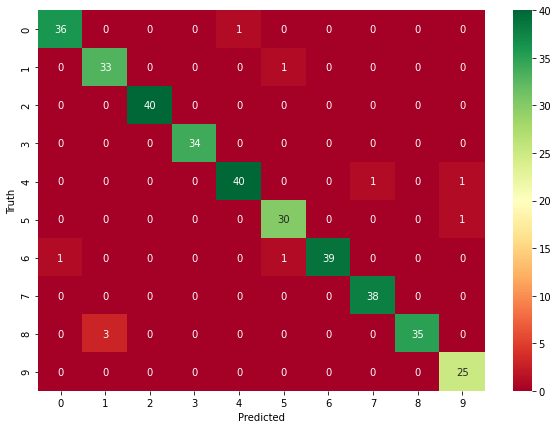

In [33]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, cmap='RdYlGn')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        37
           1       0.92      0.97      0.94        34
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       0.98      0.95      0.96        42
           5       0.94      0.97      0.95        31
           6       1.00      0.95      0.97        41
           7       0.97      1.00      0.99        38
           8       1.00      0.92      0.96        38
           9       0.93      1.00      0.96        25

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360

